In [1]:
from __future__ import print_function
import glob, os
import scipy.io as sio
from scipy.io import wavfile
import scipy
import numpy as np
from scipy import stats, signal
from numpy.random import seed
from scipy.signal import butter, lfilter, freqz, hilbert
import matplotlib.pyplot as plt
import IPython.display as ipd
import csv
import librosa
seed(1)

In [2]:
my_path = os.getcwd()
print(my_path)


/Users/ivinekuruvilla/Desktop/DNN_vision


In [3]:
fs = 16000
fs_final = 8000

In [4]:
def List_files(directory,extension):
    os.chdir(directory)
    files=[]
    for file in glob.glob("*.{}".format(extension)):
        files.append(file)

    os.chdir(my_path)
    print('pwd', os.getcwd())
    return files

In [5]:
def Chebyshev_lowpass_filter(data, fstop, fs):
    N = 10
    Rs = 60
    Wn = fstop/(fs/2);

    sos = signal.cheby2(N, Rs, Wn, 'low', analog = False, output='sos')
    filtered = signal.sosfilt(sos, data, axis=0)    

    return filtered

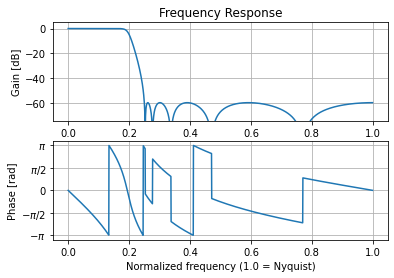

In [6]:
N = 10
Rs = 60
fstop = fs_final/2
Wn = fstop/fs;

sos = signal.cheby2(N, Rs, Wn, 'low', analog = False, output='sos')
w, h = signal.sosfreqz(sos, worN=1500)
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

In [7]:
def Chebyshev_bandpass_filter(data, tmp_fs):
    N = 9
    Rs = 50
    fstop1 = 1
    fstop2 = 9
    Wn = np.array([fstop1, fstop2])/(tmp_fs/2)

    sos = signal.cheby2(N, Rs, Wn, 'bandpass', analog = False, output='sos')
    filtered = signal.sosfilt(sos, data, axis=0)
    return filtered

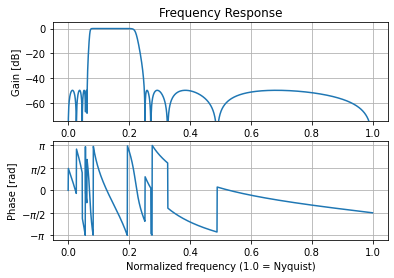

In [8]:
# Bandpass filtering between 1 kHz and 4 kHz @ 16 kHz sampling rate

N = 9
Rs = 50
fstop1 = 1000
fstop2 = 4000
Wn = np.array([fstop1, fstop2])/fs
sos = signal.cheby2(N, Rs, Wn, 'bandpass', analog = False, output='sos')

w, h = signal.sosfreqz(sos, worN=1500)
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

In [9]:
audio_path = my_path + '/'
Name_raw_Audio = List_files(audio_path,'wav')
print(Name_raw_Audio)

for idx in np.arange(0, np.shape(Name_raw_Audio)[0]):
    
    audio = wavfile.read(audio_path + Name_raw_Audio[idx])
    fs_orig = audio[0]
    speech = audio[1]

    # added on 25.10
    speech = speech[:, 0:2]/2**15

    spkr1 = speech[:,0]
    spkr2 = speech[:,1]
    print('Get spkr2 lowpassed, shape:',np.shape(spkr2))
    ipd.Audio(spkr2, rate=fs)
    
    spkr1_lowpass = Chebyshev_lowpass_filter(speech[:,0], fs_final/2, fs)    
    spkr2_lowpass = Chebyshev_lowpass_filter(speech[:,1], fs_final/2, fs)    
    print('Get spkr2 lowpassed, shape:',np.shape(spkr2_lowpass))
    ipd.Audio(spkr2_lowpass, rate=fs)
    
    spkr1_resampled = librosa.resample(spkr1_lowpass, fs, fs_final)
    spkr2_resampled = librosa.resample(spkr2_lowpass, fs, fs_final)  
    print('Get spkr2 resampled, shape:',np.shape(spkr2_resampled))
    ipd.Audio(spkr2_resampled, rate=fs_final)

pwd /Users/ivinekuruvilla/Desktop/DNN_vision
['stim_1min.wav']
Get spkr2 lowpassed, shape: (960000,)
Get spkr2 lowpassed, shape: (960000,)


/Applications/anaconda3/envs/DNN_2022/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
/Applications/anaconda3/envs/DNN_2022/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Get spkr2 resampled, shape: (480000,)


In [10]:
print("original at fs=16 kHz")
ipd.Audio(spkr2, rate=fs)  

original at fs=16 kHz


In [11]:
print("Low pass filtered at 4 kHz and fs=16 kHz")
ipd.Audio(spkr2_lowpass, rate=fs)

Low pass filtered at 4 kHz and fs=16 kHz


In [12]:
print("Resampled at fs=8 kHz")
ipd.Audio(spkr2_resampled, rate=fs_final)

Resampled at fs=8 kHz
